In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.mplot3d import Axes3D
import math
import os
from matplotlib import cm


In [2]:
from classes.cartesian.Mesh import Mesh
from classes.NeuralNet import PINN_NeuralNet
from classes.cartesian.PINN import PINN
from classes.cartesian.PDE_Model import PDE_Model
from classes.cartesian.Preconditioner import preconditioner
from classes.cartesian.Postprocessing import view_results

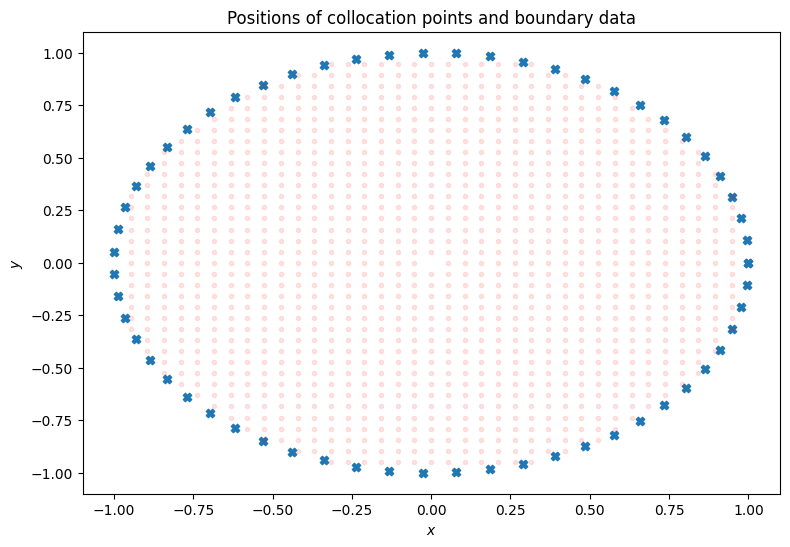

In [3]:
precond = preconditioner()

domain = ([-1,1],[-1,1])

domain = precond.set_domain(domain)

lb = {'type':'D', 'value':0, 'fun':None, 'dr':None, 'r':1}
borders = {'1':lb}
ins_domain = {'rmax': 1, 'rmin':0.02}

mesh = Mesh(domain, N_b=60, N_r=1500)
mesh.create_mesh(borders, ins_domain)
mesh.plot_points();

PINN_precond = PINN()

PINN_precond.adapt_mesh(mesh)

lr = ([1000,3000],[1e-2,5e-3,5e-4])
hyperparameters = {
        'input_shape_N': (None,2),
        'num_hidden_layers': 8,
        'num_neurons_per_layer': 20,
        'output_dim': 1,
        'activation': 'tanh'
}

PINN_precond.create_NeuralNet(PINN_NeuralNet,lr=lr,**hyperparameters)

PINN_precond.load_preconditioner(precond)


In [4]:
PINN_precond.preconditionate(N=1000,flag_time=False)

In [5]:
PINN_post = view_results(PINN_precond)

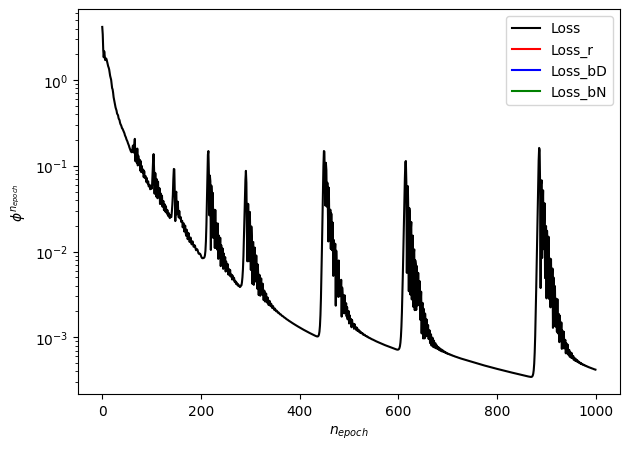

In [6]:
PINN_post.plot_loss_history();

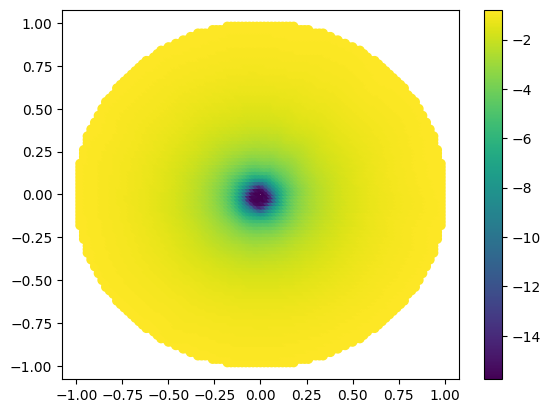

In [7]:
PINN_post.plot_u_domain_countour();

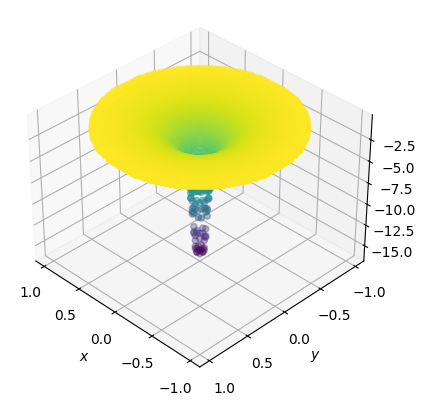

In [16]:
PINN_post.plot_u_domain_surface();

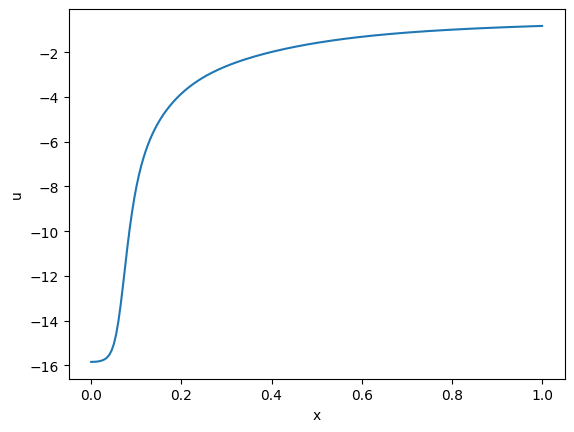

In [9]:
PINN_post.plot_u_plane()

In [19]:
x = np.linspace(0,1)
y = np.linspace(0,1)*0
x,y,u = PINN_post.evaluate_u_array([x,y])

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-15.8526535 , -15.810113  , -15.514365  , -13.914139  ,
       -10.48586   ,  -7.839188  ,  -6.3211236 ,  -5.3660235 ,
        -4.6922126 ,  -4.1799912 ,  -3.7733953 ,  -3.442267  ,
        -3.167699  ,  -2.9363825 ,  -2.7384121 ,  -2.5663164 ,
        -2.414521  ,  -2.2789261 ,  -2.1565552 ,  -2.0452602 ,
        -1.9434761 ,  -1.8500432 ,  -1.7640709 ,  -1.6848477 ,
        -1.6117778 ,  -1.5443451 ,  -1.4820905 ,  -1.4245915 ,
        -1.3714646 ,  -1.3223531 ,  -1.2769247 ,  -1.2348753 ,
        -1.1959168 ,  -1.1597884 ,  -1.1262435 ,  -1.0950624 ,
        -1.066036  ,  -1.038976  ,  -1.0137109 ,  -0.99008226,
        -0.9679476 ,  -0.94717884,  -0.92765737,  -0.9092779 ,
        -0.8919437 ,  -0.8755686 ,  -0.8600757 ,  -0.8453939 ,
        -0.8314599 ,  -0.81821656], dtype=float32)>

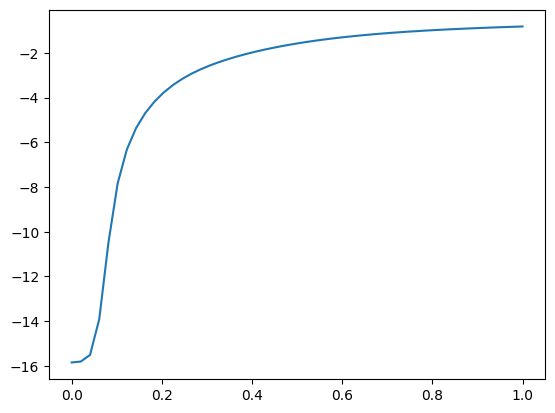

In [21]:
plt.plot(x,u)